In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('tatasteel.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-25,62.404247,62.423306,59.365021,60.951324,24.732347,74144046
1,2017-09-26,61.213329,62.594795,60.865582,62.318504,25.287109,41446259
2,2017-09-27,62.880619,62.880619,61.265728,61.865952,25.103474,52058583
3,2017-09-28,62.204174,62.547161,61.227619,61.899300,25.117010,69053825
4,2017-09-29,62.385197,62.594795,61.932644,62.170830,25.227190,29796912


In [2]:
print(data.shape)

(1236, 7)


In [3]:
data.index = pd.to_datetime(data['Date'])
data = data.drop(['Date'], axis='columns')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-25,62.404247,62.423306,59.365021,60.951324,24.732347,74144046
2017-09-26,61.213329,62.594795,60.865582,62.318504,25.287109,41446259
2017-09-27,62.880619,62.880619,61.265728,61.865952,25.103474,52058583
2017-09-28,62.204174,62.547161,61.227619,61.899300,25.117010,69053825
2017-09-29,62.385197,62.594795,61.932644,62.170830,25.227190,29796912
...,...,...,...,...,...,...
2022-09-19,106.199997,106.199997,103.000000,103.099998,103.099998,51146568
2022-09-20,104.199997,106.349998,104.000000,105.800003,105.800003,52140254
2022-09-21,105.800003,107.199997,104.300003,104.449997,104.449997,46142823


In [4]:
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low
x = data[['Open-Close', 'High-Low']]
print(x)

            Open-Close  High-Low
Date                            
2017-09-25    1.452923  3.058285
2017-09-26   -1.105175  1.729213
2017-09-27    1.014667  1.614891
2017-09-28    0.304874  1.319542
2017-09-29    0.214367  0.662151
...                ...       ...
2022-09-19    3.099999  3.199997
2022-09-20   -1.600006  2.349998
2022-09-21    1.350006  2.899994
2022-09-22    0.849999  1.800003
2022-09-23    1.899994  4.150002

[1236 rows x 2 columns]


In [5]:
y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
print(y)

[1 0 1 ... 0 1 0]


In [6]:
split_percentage = 0.7
split = int(split_percentage*len(data))

a = x[:split]
b = y[:split]
print(a)
print(b)

            Open-Close  High-Low
Date                            
2017-09-25    1.452923  3.058285
2017-09-26   -1.105175  1.729213
2017-09-27    1.014667  1.614891
2017-09-28    0.304874  1.319542
2017-09-29    0.214367  0.662151
...                ...       ...
2021-03-19   -3.025001  5.550003
2021-03-22   -1.239997  2.065002
2021-03-23    0.485000  1.614998
2021-03-24    2.819999  3.405006
2021-03-25   -1.305000  4.235001

[865 rows x 2 columns]
[1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0
 1 0 1 0 1 0 1 1 0 1 1

In [7]:
X = x[split:]
Y = y[split:]
print(X)
print(Y)

            Open-Close  High-Low
Date                            
2021-03-26   -3.644997  4.970001
2021-03-30   -2.000000  3.209999
2021-03-31   -1.784996  3.339996
2021-04-01   -4.205002  4.989997
2021-04-05   -0.575005  4.070008
...                ...       ...
2022-09-19    3.099999  3.199997
2022-09-20   -1.600006  2.349998
2022-09-21    1.350006  2.899994
2022-09-22    0.849999  1.800003
2022-09-23    1.899994  4.150002

[371 rows x 2 columns]
[1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1
 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0
 1 0 0 0 0 0 1 1 1 1 1

In [8]:
model = SVC().fit(a, b)

In [9]:
data['Predicted_Signal'] = model.predict(x)
print(data['Predicted_Signal'])

Date
2017-09-25    1
2017-09-26    0
2017-09-27    1
2017-09-28    1
2017-09-29    1
             ..
2022-09-19    1
2022-09-20    1
2022-09-21    1
2022-09-22    1
2022-09-23    1
Name: Predicted_Signal, Length: 1236, dtype: int64


In [10]:
data['Return'] = data.Close.pct_change()
data['Return']

Date
2017-09-25         NaN
2017-09-26    0.022431
2017-09-27   -0.007262
2017-09-28    0.000539
2017-09-29    0.004387
                ...   
2022-09-19   -0.024598
2022-09-20    0.026188
2022-09-21   -0.012760
2022-09-22   -0.008138
2022-09-23    0.006757
Name: Return, Length: 1236, dtype: float64

In [11]:
data['Strategy_Return'] = data.Return *data.Predicted_Signal.shift(1)
data['Strategy_Return'] 

Date
2017-09-25         NaN
2017-09-26    0.022431
2017-09-27   -0.000000
2017-09-28    0.000539
2017-09-29    0.004387
                ...   
2022-09-19   -0.024598
2022-09-20    0.026188
2022-09-21   -0.012760
2022-09-22   -0.008138
2022-09-23    0.006757
Name: Strategy_Return, Length: 1236, dtype: float64

In [12]:
data['Cum_Strategy'] = data['Strategy_Return'].cumsum()
data['Cum_Strategy']

Date
2017-09-25         NaN
2017-09-26    0.022431
2017-09-27    0.022431
2017-09-28    0.022970
2017-09-29    0.027356
                ...   
2022-09-19    0.758406
2022-09-20    0.784594
2022-09-21    0.771834
2022-09-22    0.763696
2022-09-23    0.770453
Name: Cum_Strategy, Length: 1236, dtype: float64

In [13]:
data['Cum_Ret'] = data['Return'].cumsum()
data['Cum_Ret']

Date
2017-09-25         NaN
2017-09-26    0.022431
2017-09-27    0.015169
2017-09-28    0.015708
2017-09-29    0.020094
                ...   
2022-09-19    0.924729
2022-09-20    0.950918
2022-09-21    0.938158
2022-09-22    0.930020
2022-09-23    0.936777
Name: Cum_Ret, Length: 1236, dtype: float64

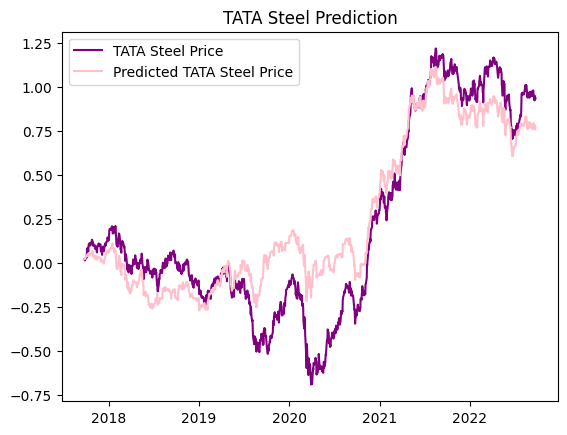

In [14]:
plt.plot(data['Cum_Ret'],color='purple', label = 'TATA Steel Price')
plt.plot(data['Cum_Strategy'],color='pink', label = 'Predicted TATA Steel Price')
plt.title('TATA Steel Prediction')
plt.legend()

In [16]:
import tracemalloc
import pandas as pd
import dask.dataframe as dd
import time
def tracing_start():
    tracemalloc.stop()
    print("nTracing Status : ", tracemalloc.is_tracing())
    tracemalloc.start()
    print("Tracing Status : ", tracemalloc.is_tracing())
def tracing_mem():
    first_size, first_peak = tracemalloc.get_traced_memory()
    peak = first_peak/(1024*1024)
    print("Peak Size in MB - ", peak)
tracing_start()
start = time.time()
sq_list1 = [elem + elem**2 for elem in range(1,1000)]
end = time.time()
print("time elapsed {} milli seconds".format((end-start)*1000))
tracing_mem()

nTracing Status :  False
Tracing Status :  True
time elapsed 3.1235218048095703 milli seconds
Peak Size in MB -  0.04642677307128906


In [17]:
import cProfile 
cProfile.run("[(a, b) for a in (1, 3) for b in (2, 4)]")

         4 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<listcomp>)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




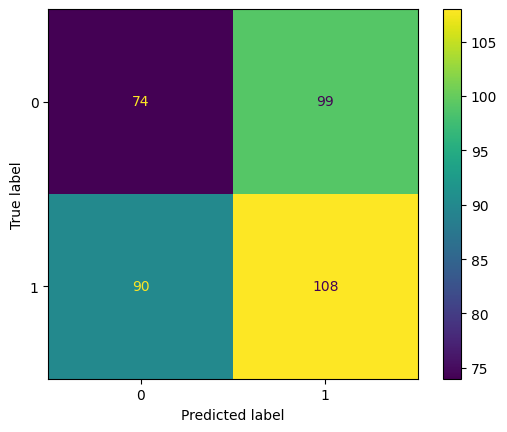

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay 
X_train,X_test,Y_train,Y_test= train_test_split(x,y, test_size=0.3, random_state=000) 
S = SVC().fit(X_train, Y_train) 
ConfusionMatrixDisplay.from_estimator(S,X_test,Y_test)